Analysis of energectics

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import dask
import dask.distributed
from xgcm import Grid
%matplotlib inline

In [22]:
ppdir = "/work/Hemant.Khatri/MOM6_idealised/SWM_Two_Layer/Barotropic_Baroclinic/Postprocessing/Energetics/"

ds_2L_FW = xr.open_dataset(ppdir + "2L_Fix_Width.nc")
ds_2L_VW = xr.open_dataset(ppdir + "2L_Var_Width.nc")
ds_2L_FW_f = xr.open_dataset(ppdir + "2L_fplane_Fix_Width.nc")
ds_2L_VW_f = xr.open_dataset(ppdir + "2L_fplane_Var_Width.nc")

ds_1L_FW = xr.open_dataset(ppdir + "1L_Fix_Width.nc")
ds_1L_VW = xr.open_dataset(ppdir + "1L_Var_Width.nc")

In [29]:
print(ds_1L_FW)

<xarray.Dataset>
Dimensions:   (tau: 7, xh: 400, xq: 400, yh: 800, zl: 1)
Coordinates:
  * zl        (zl) float64 1.028e+03
  * yh        (yh) float64 2.0 6.0 10.0 14.0 ... 3.19e+03 3.194e+03 3.198e+03
  * xh        (xh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
  * xq        (xq) float64 4.0 8.0 12.0 16.0 ... 1.592e+03 1.596e+03 1.6e+03
Dimensions without coordinates: tau
Data variables:
    MKE_bdt1  (tau, zl, yh, xh) float64 ...
    EKE_bdt1  (tau, zl, yh, xh) float64 ...
    MKE_bdt2  (tau, zl, yh, xh) float64 ...
    EKE_bdt2  (tau, zl, yh, xh) float64 ...
    MKE_bdt3  (tau, zl, yh, xh) float64 ...
    EKE_bdt3  (tau, zl, yh, xh) float64 ...
    MKE_bdt4  (tau, yh, xh, zl) float64 ...
    EKE_bdt4  (tau, yh, xh, zl) float64 ...
    depth     (yh, xh) float64 ...
    taux      (tau, yh, xq) float64 ...


In [8]:
print(ds_2L_FW['MKE_bdt2'], ds_2L_FW['MKE_bdt3'])

<xarray.DataArray 'MKE_bdt2' (tau: 7, zl: 2, yh: 800, xh: 400)>
[4480000 values with dtype=float64]
Coordinates:
  * zl       (zl) float64 1.027e+03 1.028e+03
  * yh       (yh) float64 -1.598e+03 -1.594e+03 ... 1.594e+03 1.598e+03
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
Dimensions without coordinates: tau
Attributes:
    standard_name:  MKE - Reynolds stress term
    units:          J/m^2 <xarray.DataArray 'MKE_bdt3' (tau: 7, zl: 2, yh: 800, xh: 400)>
[4480000 values with dtype=float32]
Coordinates:
  * zl       (zl) float64 1.027e+03 1.028e+03
  * yh       (yh) float64 -1.598e+03 -1.594e+03 ... 1.594e+03 1.598e+03
  * xh       (xh) float64 2.0 6.0 10.0 14.0 ... 1.59e+03 1.594e+03 1.598e+03
Dimensions without coordinates: tau
Attributes:
    standard_name:  MKE - Form stress term
    units:          J/m^2


$\large \text{beta-plane}$

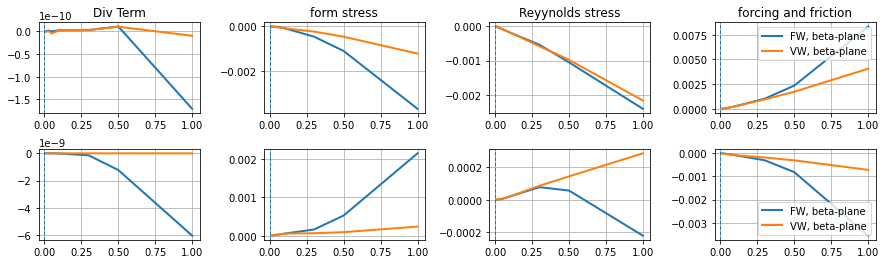

In [13]:
tau = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]

grid_plot = plt.GridSpec(2, 4, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=[15,4])

for i in range(0,2):
    ax = fig.add_subplot(grid_plot[i,0])
    ax.plot(tau, ds_2L_FW['MKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW['MKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('Div Term')

    ax = fig.add_subplot(grid_plot[i,1])
    ax.plot(tau, ds_2L_FW['MKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW['MKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('form stress')
    
    ax = fig.add_subplot(grid_plot[i,2])
    ax.plot(tau, ds_2L_FW['MKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW['MKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('Reynolds stress')
    
    ax = fig.add_subplot(grid_plot[i,3])
    ax.plot(tau, ds_2L_FW['MKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW['MKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.legend()
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('forcing and friction')

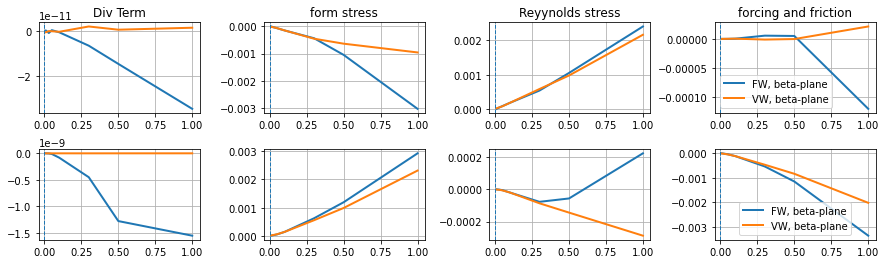

In [12]:
tau = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]

grid_plot = plt.GridSpec(2, 4, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=[15,4])

for i in range(0,2):
    ax = fig.add_subplot(grid_plot[i,0])
    ax.plot(tau, ds_2L_FW['EKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW['EKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('Div Term')

    ax = fig.add_subplot(grid_plot[i,1])
    ax.plot(tau, ds_2L_FW['EKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW['EKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('form stress')
    
    ax = fig.add_subplot(grid_plot[i,2])
    ax.plot(tau, ds_2L_FW['EKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW['EKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('Reynolds stress')
    
    ax = fig.add_subplot(grid_plot[i,3])
    ax.plot(tau, ds_2L_FW['EKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW['EKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.legend()
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('forcing and friction')

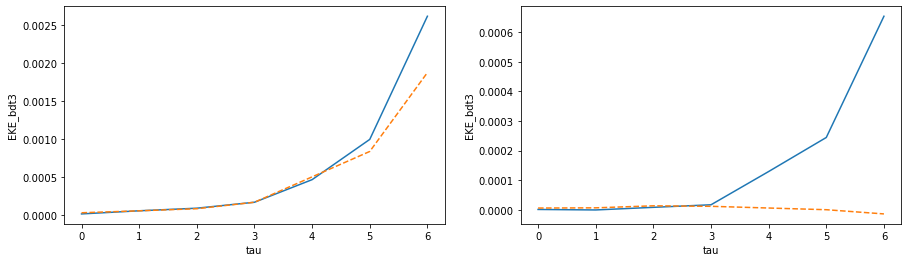

In [47]:
fig = plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
ds_2L_FW['EKE_bdt3'].sum('zl').mean(['yh','xh']).plot()
ds_2L_VW['EKE_bdt3'].sum('zl').mean(['yh','xh']).plot(ls='--')

plt.subplot(1,2,2)
ds_2L_FW_f['EKE_bdt3'].sum('zl').mean(['yh','xh']).plot()
ds_2L_VW_f['EKE_bdt3'].sum('zl').mean(['yh','xh']).plot(ls='--')

$\large \text{f-plane}$

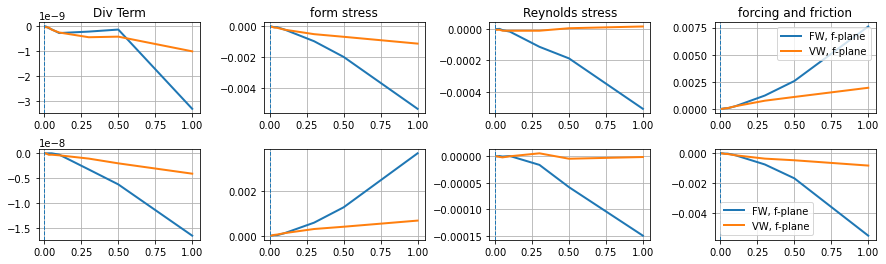

In [27]:
tau = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]

grid_plot = plt.GridSpec(2, 4, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=[15,4])

for i in range(0,2):
    ax = fig.add_subplot(grid_plot[i,0])
    ax.plot(tau, ds_2L_FW_f['MKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW_f['MKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('Div Term')

    ax = fig.add_subplot(grid_plot[i,1])
    ax.plot(tau, ds_2L_FW_f['MKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW_f['MKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('form stress')
    
    ax = fig.add_subplot(grid_plot[i,2])
    ax.plot(tau, ds_2L_FW_f['MKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW_f['MKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('Reynolds stress')
    
    ax = fig.add_subplot(grid_plot[i,3])
    ax.plot(tau, ds_2L_FW_f['MKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, f-plane')
    ax.plot(tau, ds_2L_VW_f['MKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, f-plane')
    ax.legend()
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('forcing and friction')

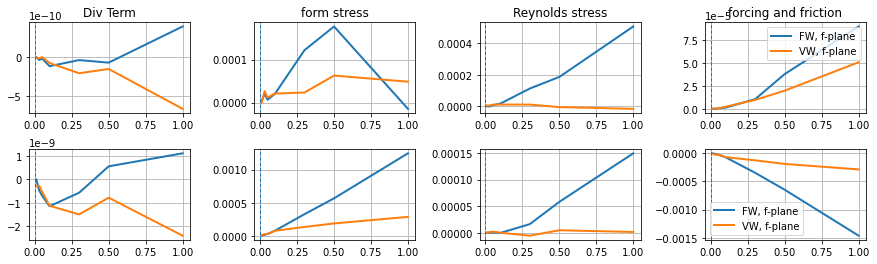

In [26]:
tau = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]

grid_plot = plt.GridSpec(2, 4, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=[15,4])

for i in range(0,2):
    ax = fig.add_subplot(grid_plot[i,0])
    ax.plot(tau, ds_2L_FW_f['EKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW_f['EKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('Div Term')

    ax = fig.add_subplot(grid_plot[i,1])
    ax.plot(tau, ds_2L_FW_f['EKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW_f['EKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('form stress')
    
    ax = fig.add_subplot(grid_plot[i,2])
    ax.plot(tau, ds_2L_FW_f['EKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_2L_VW_f['EKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('Reynolds stress')
    
    ax = fig.add_subplot(grid_plot[i,3])
    ax.plot(tau, ds_2L_FW_f['EKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, f-plane')
    ax.plot(tau, ds_2L_VW_f['EKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, f-plane')
    ax.legend()
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('forcing and friction')

$\large \text{one-layer runs}$

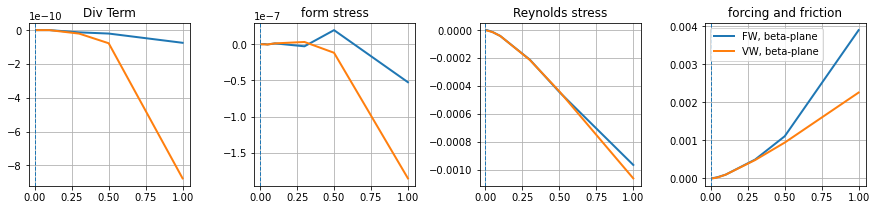

In [31]:
tau = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]

grid_plot = plt.GridSpec(1, 4, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=[15,3])

for i in range(0,1):
    ax = fig.add_subplot(grid_plot[i,0])
    ax.plot(tau, ds_1L_FW['MKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_1L_VW['MKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    ax.set_title('Div Term')

    ax = fig.add_subplot(grid_plot[i,1])
    ax.plot(tau, ds_1L_FW['MKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_1L_VW['MKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('form stress')
    
    ax = fig.add_subplot(grid_plot[i,2])
    ax.plot(tau, ds_1L_FW['MKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_1L_VW['MKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('Reynolds stress')
    
    ax = fig.add_subplot(grid_plot[i,3])
    ax.plot(tau, ds_1L_FW['MKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_1L_VW['MKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.legend()
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('forcing and friction')

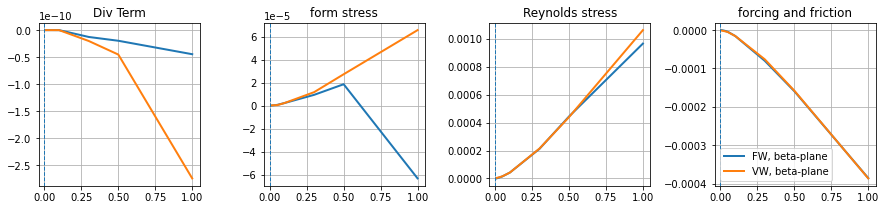

In [32]:
tau = [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1.0]

grid_plot = plt.GridSpec(1, 4, wspace=0.4, hspace=0.4)
fig = plt.figure(figsize=[15,3])

for i in range(0,1):
    ax = fig.add_subplot(grid_plot[i,0])
    ax.plot(tau, ds_1L_FW['EKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_1L_VW['EKE_bdt1'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    ax.set_title('Div Term')

    ax = fig.add_subplot(grid_plot[i,1])
    ax.plot(tau, ds_1L_FW['EKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_1L_VW['EKE_bdt2'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('form stress')
    
    ax = fig.add_subplot(grid_plot[i,2])
    ax.plot(tau, ds_1L_FW['EKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_1L_VW['EKE_bdt3'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('Reynolds stress')
    
    ax = fig.add_subplot(grid_plot[i,3])
    ax.plot(tau, ds_1L_FW['EKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='FW, beta-plane')
    ax.plot(tau, ds_1L_VW['EKE_bdt4'].isel(zl=i).mean(['yh','xh']), lw=2, label='VW, beta-plane')
    ax.legend()
    ax.axvline(x=0, lw=1, ls='--')
    plt.grid()
    if(i==0):
        ax.set_title('forcing and friction')